In [1]:
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!git checkout main
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 16493, done.
remote: Total 16493 (delta 0), reused 0 (delta 0), pack-reused 16493 (from 1)
Receiving objects: 100% (16493/16493), 43.81 MiB | 23.22 MiB/s, done.
Resolving deltas: 100% (11488/11488), done.
/home/tim/Projects/mmsegProject/mmsegmentation
Already on 'main'
Your branch is up to date with 'origin/main'.
Obtaining file:///home/tim/Projects/mmsegProject/mmsegmentation
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmsegmentation
    Found existing installation: mmsegmentation 1.2.2
    Uninstalling mmsegmentation-1.2.2:
      Successfully uninstalled mmsegmentation-1.2.2
  DEPRECATION: Legacy editable install of mmsegmentation==1.2.2 from file:///home/tim/Projects/mmsegProject/mmsegmentation (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation i

In [2]:
!pip install ftfy
!pip install -U openmim
!mim download mmsegmentation --config pspnet_r50-d8_4xb2-40k_cityscapes-512x1024 --dest .
!python demo/image_demo.py demo/demo.png configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth --device cuda:0 --out-file ../result.jpg

processing pspnet_r50-d8_4xb2-40k_cityscapes-512x1024...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.1/187.1 MiB 11.1 MB/s eta 0:00:0000:0100:01
Successfully downloaded pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth to /home/tim/Projects/mmsegProject/mmsegmentation
Successfully dumped pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py to /home/tim/Projects/mmsegProject/mmsegmentation
/home/tim/Projects/mmsegProject/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by local backend from path: pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
/root/miniconda3/envs/mm/lib/python3.11/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualizati

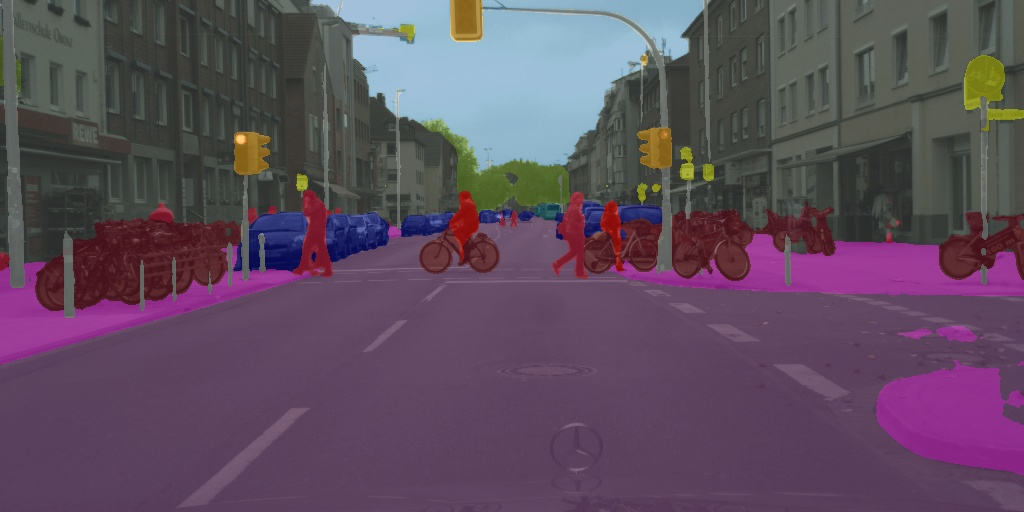

In [3]:
from IPython.display import Image
Image(filename='../result.jpg')

In [4]:
from mmseg.apis import inference_model, init_model, show_result_pyplot
from IPython.display import Image
import mmcv
import os

#pspnet
#config_file = 'pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
#checkpoint_file = 'pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

#Swin
config_file = 'swin-base-patch4-window12-in1k-384x384-pre_upernet_8xb2-160k_ade20k-512x512.py'
checkpoint_file = 'upernet_swin_base_patch4_window12_512x512_160k_ade20k_pretrain_384x384_1K_20210531_132020-05b22ea4.pth'

# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

# download image
imgurl = "https://static.studyusa.com/school/aws_8NtaAx3rayPpLpnWlI9f4xM8NW0FE9R4_lg_1x.jpg"
!wget -O img.png {imgurl}

# test a single image and show the results
img = 'img.png'  # or img = mmcv.imread(img), which will only load it once
result = inference_model(model, img)
show_result_pyplot(model, img, result, show=True, out_file='result.jpg', opacity=0.5)

Image(filename='result.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'swin-base-patch4-window12-in1k-384x384-pre_upernet_8xb2-160k_ade20k-512x512.py'

In [ ]:
import torch
from torch import Tensor


# Example 1: an operator without data-dependent output shape
@torch.library.custom_op("mylib::custom_linear", mutates_args=())
def custom_linear(x: Tensor, weight: Tensor, bias: Tensor) -> Tensor:
    raise NotImplementedError("Implementation goes here")


@torch.library.register_fake("mylib::custom_linear")
def _(x, weight, bias):
    assert x.dim() == 2
    assert weight.dim() == 2
    assert bias.dim() == 1
    assert x.shape[1] == weight.shape[1]
    assert weight.shape[0] == bias.shape[0]
    assert x.device == weight.device

    return (x @ weight.t()) + bias


with torch._subclasses.fake_tensor.FakeTensorMode():
    x = torch.randn(2, 3)
    w = torch.randn(3, 3)
    b = torch.randn(3)
    y = torch.ops.mylib.custom_linear(x, w, b)

assert y.shape == (2, 3)